# NYT Data Explorer

Explores the NYT county data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

The NYT data (3/29) is from https://github.com/nytimes/covid-19-data

In [2]:
df = pd.read_csv('nyt_data/us-counties.csv', parse_dates=['date'])

In [7]:
pa_only = df[df['state']=='Pennsylvania'].reset_index(drop=True)

In [8]:
pa_only

,date,county,state,fips,cases,deaths
0,2020-03-06,Delaware,Pennsylvania,42045.0,1,0
1,2020-03-06,Wayne,Pennsylvania,42127.0,1,0
2,2020-03-07,Delaware,Pennsylvania,42045.0,1,0
3,2020-03-07,Montgomery,Pennsylvania,42091.0,2,0
4,2020-03-07,Wayne,Pennsylvania,42127.0,1,0
...,...,...,...,...,...,...
550,2020-03-29,Warren,Pennsylvania,42123.0,1,0
551,2020-03-29,Washington,Pennsylvania,42125.0,24,0
552,2020-03-29,Wayne,Pennsylvania,42127.0,7,0
553,2020-03-29,Westmoreland,Pennsylvania,42129.0,47,0


In [9]:
surrounding = ['Beaver', 'Butler', 'Armstrong', 'Westmoreland', 'Allegheny', 'Washington', 'Fayette']

In [20]:
near_pgh = pa_only[pa_only['county'].isin(surrounding)].reset_index(drop=True)
near_pgh.drop(columns=['fips'], inplace=True)

In [26]:
near_pgh_summary = near_pgh.groupby(['date']).sum()
near_pgh_summary.index
near_pgh_summary.index.freq='D'
near_pgh_summary.sort_index(inplace=True)

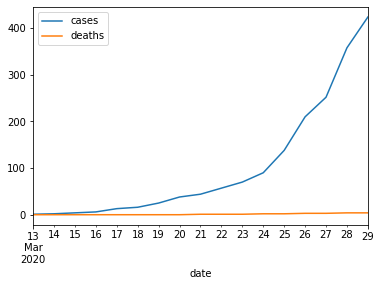

In [27]:
ax = near_pgh_summary.plot()

In [28]:
near_pgh_summary

,cases,deaths
date,,
2020-03-13,1,0
2020-03-14,2,0
2020-03-15,4,0
2020-03-16,6,0
2020-03-17,13,0
2020-03-18,16,0
2020-03-19,25,0
2020-03-20,38,0
2020-03-21,44,1


In [29]:
pa_only[pa_only['county']=='Allegheny'].reset_index(drop=True)

,date,county,state,fips,cases,deaths
0,2020-03-14,Allegheny,Pennsylvania,42003.0,1,0
1,2020-03-15,Allegheny,Pennsylvania,42003.0,3,0
2,2020-03-16,Allegheny,Pennsylvania,42003.0,5,0
3,2020-03-17,Allegheny,Pennsylvania,42003.0,10,0
4,2020-03-18,Allegheny,Pennsylvania,42003.0,12,0
5,2020-03-19,Allegheny,Pennsylvania,42003.0,18,0
6,2020-03-20,Allegheny,Pennsylvania,42003.0,28,0
7,2020-03-21,Allegheny,Pennsylvania,42003.0,31,1
8,2020-03-22,Allegheny,Pennsylvania,42003.0,40,1
9,2020-03-23,Allegheny,Pennsylvania,42003.0,48,1


### Curve Fitting

In [45]:
from scipy.optimize import curve_fit

In [46]:
y = near_pgh_summary['cases'].values

In [47]:
x = np.arange(len(y))

In [48]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [53]:
popt_exp, pcov_exp = curve_fit(exponential, x, y, p0=[0.2, 0.5, 0.0])

In [54]:
popt_exp

array([ 5.88802833,  0.27068926, -7.09373754])

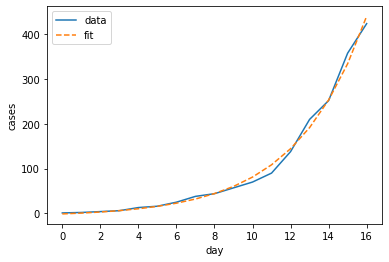

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.plot(x,exponential(x,popt_exp[0],popt_exp[1],popt_exp[2]),'--')
ax.set_xlabel('day')
ax.set_ylabel('cases')
ax.legend(['data', 'fit'])

In [57]:
popt_exp

array([ 5.88802833,  0.27068926, -7.09373754])